# Libraries


In [ ]:
#@title
from skimage.morphology import thin, skeletonize
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt
import cv2
# import cv2.imshow
import time
from PIL import Image
from matplotlib import cm
from PIL import Image

# Create Tree using binary image

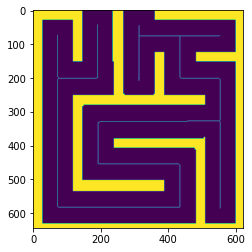

In [ ]:
world = rgb2gray(cv2.imread('mazeReal.png'))
# Binarize image to reduce noise that may be present in the image
thresh = threshold_otsu(world)
world = world > thresh
#world = 1 - world
# skeletonize the free space to find the voronoi space
thinned = skeletonize(world)
#thinned = thin(world)
#skel = skeletonize(world)
plt.imshow(thinned+1-world)

# Create a tree using the voronoi space
waypoints = [];
waypointsR = [];
waypointsC = [];
for i in range(thinned.shape[0]):
  for j in range(thinned.shape[1]):
    if thinned[i,j] == True:
      waypoints.append([j,thinned.shape[0]-i])
      waypointsR.append(j);
      waypointsC.append(thinned.shape[0]-i);

#In this section we do some coordinate transformations. Take waypoints to image 
#frame
waypointsF = []
for i in waypoints:
  waypointsF.append([i[0],-i[1]+thinned.shape[0]])
waypoints = waypointsF

start = waypoints[0]
Currentloc = []
tree = {}
for i in range(len(waypoints)):
  x = waypoints[i][0]
  y = waypoints[i][1]
  neighbours = []
  for j in range(len(waypoints)):
    x_new = waypoints[j][0]
    y_new = waypoints[j][1]
    #              left                        right                 
    if ((x == x_new + 1) and (y == y_new)) or ((x == x_new -1) and (y == y_new)) or ((x == x_new) and (y == y_new +1)) or ((x == x_new) and (y == y_new - 1)) or ((x == x_new+1) and (y == y_new+1)) or ((x == x_new - 1) and (y == y_new - 1)) or ((x == x_new+1) and (y == y_new-1)) or ((x == x_new - 1) and (y == y_new + 1)):
      neighbours.append(str(waypoints[j]))
      #print(neighbours)
  tree[str(waypoints[i])]  = neighbours

**Select a starting point on bottom left corer and end point on top right**

In [8]:
# select start and end points from the voronoi space
smallest = []
largest = []
for i in waypoints:
  if i[0] < 80 and i[1] > 180 and i[1] < 220:
    smallest.append(i)
  if i[0] < 800 and i[1] > 310-50 and i[1] < 310+50:
    largest.append(i)

startPoint = [smallest[0][1],smallest[0][0]]
endPoint = [largest[0][1],largest[0][0]]

startPoint,endPoint

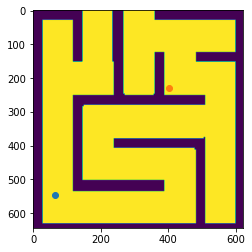

In [27]:
plt.imshow(world)
plt.scatter(startPoint[0],-startPoint[1]+thinned.shape[0])
plt.scatter(endPoint[0],-endPoint[1]+thinned.shape[0])
plt.show() 

**BFS Shortest Path**


In [12]:
def BFS_SP(graph, start, goal):
    explored = []
     
    # Queue for traversing the
    # graph in the BFS
    queue = [[start]]
     
    # If the desired node is
    # reached
    if start == goal:
        print("Same Node")
        return
     
    # Loop to traverse the graph
    # with the help of the queue
    while queue:
        path = queue.pop(0)
        node = path[-1]
         
        # Condition to check if the
        # current node is not visited
        if node not in explored:
            neighbours = graph[node]
             
            # Loop to iterate over the
            # neighbours of the node
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                 
                # Condition to check if the
                # neighbour node is the goal
                if neighbour == goal:
                    print("Shortest path = ", *new_path)
                    return new_path
            explored.append(node)
 
    # Condition when the nodes
    # are not connected
    print("So sorry, but a connecting"\
                "path doesn't exist :(")
    return

**Find path from the voronoi tree using BFS**

In [ ]:
a = BFS_SP(tree, str(startPoint), str(endPoint))
b = [i[1:-1] for i in a]
b = [[int(i.split(", ")[0]) ,int(i.split(", ")[1])] for i in b]
waypointsFinal = b
len(waypointsFinal)

**Display the results**

In [ ]:
#image = cv2.UMat.get(cv2.circle(world, (thinned.shape[0]-start[1],start[0]), radius=20,color=(0, 0, 255), thickness=-1))
plt.imshow(world)
for i in range(len(waypointsFinal)):
  plt.scatter(waypointsFinal[i][0],-waypointsFinal[i][1]+thinned.shape[0])
plt.show() 

**Code for saving multiple frames for animation purposes**

In [ ]:
# plt.figure()
# video = []
# for i in range(0,len(waypointsFinal),10):
#   image = cv2.UMat.get(cv2.circle(world, (waypointsFinal[i][0],-waypointsFinal[i][1]+thinned.shape[0]), radius=10,color=(0, 0, 255), thickness=-1))
#   plt.imshow(image,cmap='gray')
#   #plt.show()
#   plt.imsave('/content/maze1/'+str(i)+'.png',image,cmap='gray')
#   plt.clf()

In [ ]:
# !zip -r /content/maze1.zip /content/maze1